In [104]:
import numpy as np
import matplotlib.pyplot as plt


b0 = 0.170639
b1 = 0.341278
b2 = 0.170639

a1 = -0.541295
a2 = 0.223851

N = 100

x = np.zeros(N)
y = np.zeros(N)

y_z1 = 0
y_z2 = 0

x_z1 = 0
x_z2 = 0

x[0] = 1

for i in range(len(y)):
    y[i] = b0*x[i] + b1*x_z1 + b2*x_z2 - a1*y_z1 - a2*y_z2
    y_z2 = y_z1
    y_z1 = y[i]
    
    x_z2 = x_z1
    x_z1 = x[i] 


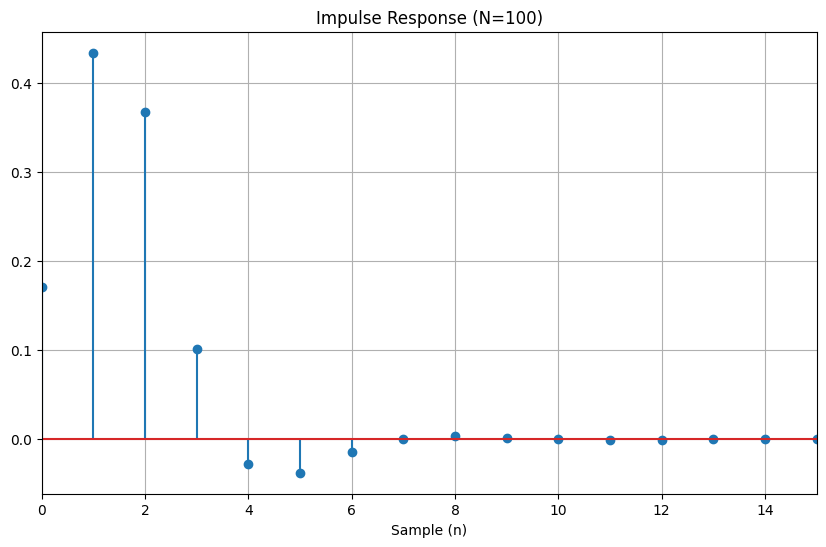

In [105]:
plt.figure(figsize=(10,6))
plt.stem(y)
plt.xlim([0,15])
plt.title(f"Impulse Response (N={N})")
plt.xlabel("Sample (n)")


plt.grid(True)

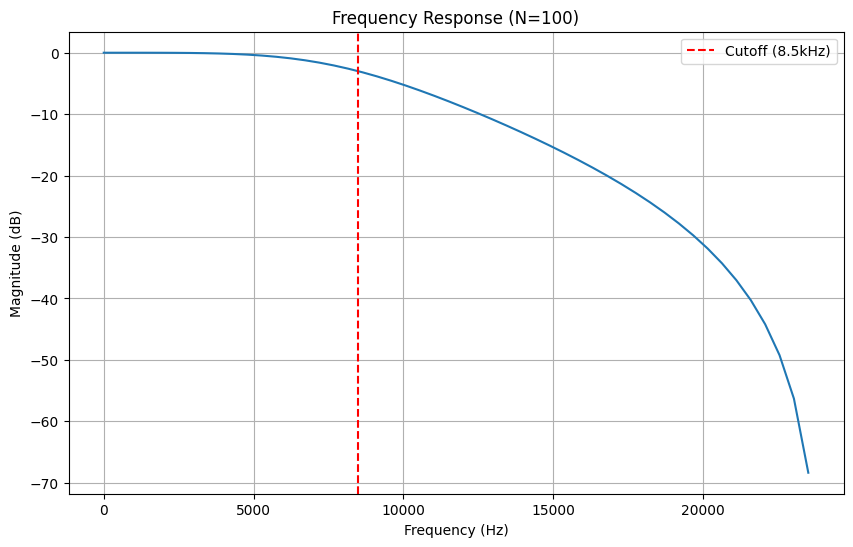

In [106]:
import numpy as np
import matplotlib.pyplot as plt


Y_fft = np.fft.fft(y)

magnitude = 20 * np.log10(np.abs(Y_fft) + 1e-10)

Fs = 48000
N = len(y)
freqs = np.fft.fftfreq(N, 1/Fs)

half_N = N // 2

plt.figure(figsize=(10, 6))
plt.plot(freqs[:half_N], magnitude[:half_N])
plt.title(f"Frequency Response (N={N})")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude (dB)")
plt.grid(True)
plt.axvline(8500, color='r', linestyle='--', label='Cutoff (8.5kHz)') 
plt.legend()
plt.show()

In [107]:


b0 = 0.170639
b1 = 0.341278
b2 = 0.170639

a1 = -0.541295
a2 = 0.223851


class biquad:
    def __init__(self, b0,b1,b2,a1,a2):
        self.b0 = b0
        self.b1 = b1
        self.b2 = b2
        
        self.a1 = a1
        self.a2 = a2
        
        self.y_z1 = 0
        self.y_z2 = 0

        self.x_z1 = 0
        self.x_z2 = 0
        
    def out(self,input):
        output = self.b0*input + self.b1*self.x_z1 + self.b2*self.x_z2 - self.a1*self.y_z1 - self.a2*self.y_z2
                
        self.y_z2 = self.y_z1
        self.y_z1 = output
        
        self.x_z2 = self.x_z1
        self.x_z1 = input
        
        return output
                
                    
                
        

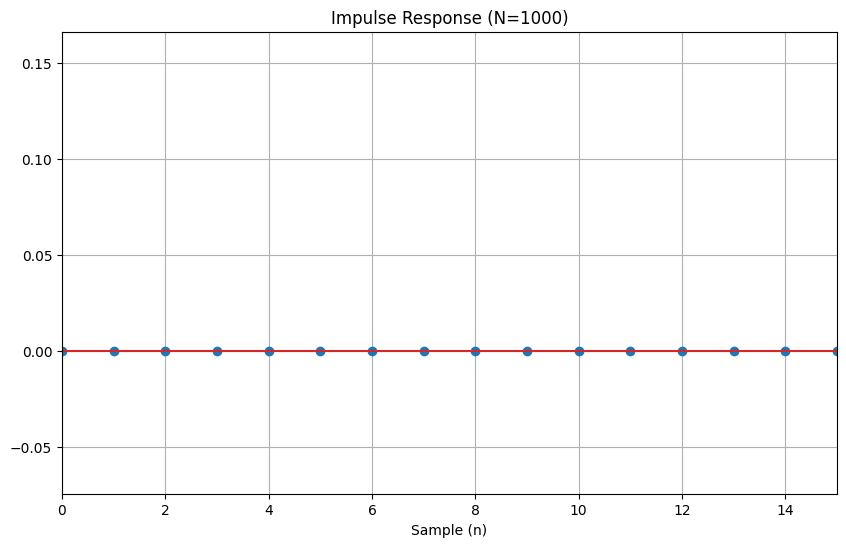

In [ ]:
N = 1000

x = np.zeros(N)
y = np.zeros(N)

x[0] = 1


sos_chain = [biquad(b0,b1,b2,a1,a2) for i in range(32)]

for i in range(len(x)):
    temp_sample = x[i]
    
    for filter in sos_chain:
        temp_sample = filter.out(temp_sample)
        
    y[i] = temp_sample


plt.figure(figsize=(10,6))
plt.stem(y)
# plt.xlim([0,15])
plt.title(f"Impulse Response (N={N})")
plt.xlabel("Sample (n)")


plt.grid(True)

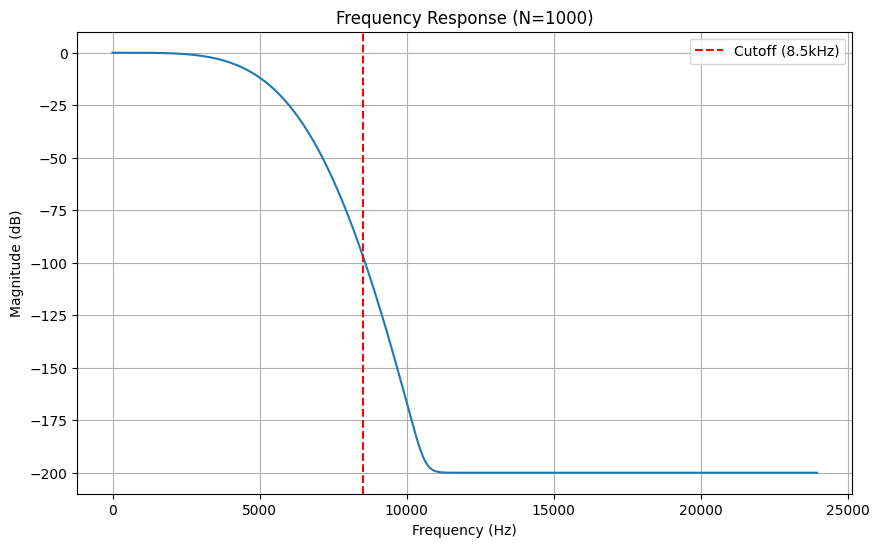

In [109]:
import numpy as np
import matplotlib.pyplot as plt


Y_fft = np.fft.fft(y)

magnitude = 20 * np.log10(np.abs(Y_fft) + 1e-10)

Fs = 48000
N = len(y)
freqs = np.fft.fftfreq(N, 1/Fs)

half_N = N // 2

plt.figure(figsize=(10, 6))
plt.plot(freqs[:half_N], magnitude[:half_N])
plt.title(f"Frequency Response (N={N})")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude (dB)")
plt.grid(True)
plt.axvline(8500, color='r', linestyle='--', label='Cutoff (8.5kHz)') 
plt.legend()
plt.show()